In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import os, sys

In [2]:
# change path as needed.
dset = 'url'
sgd_logpath = '../scripts/sample_logs/' + dset + '/sgd/'
casgd_logpath = '../scripts/sample_logs/' + dset + '/casgd/min/'
global_fontsize = 18


[14203.7, 12037.24, 14939.96, 19375.85]
[158.90798595413636, 99.62045171549866, 551.3358417516496, 2263.2239068417425]


<IPython.core.display.Javascript object>


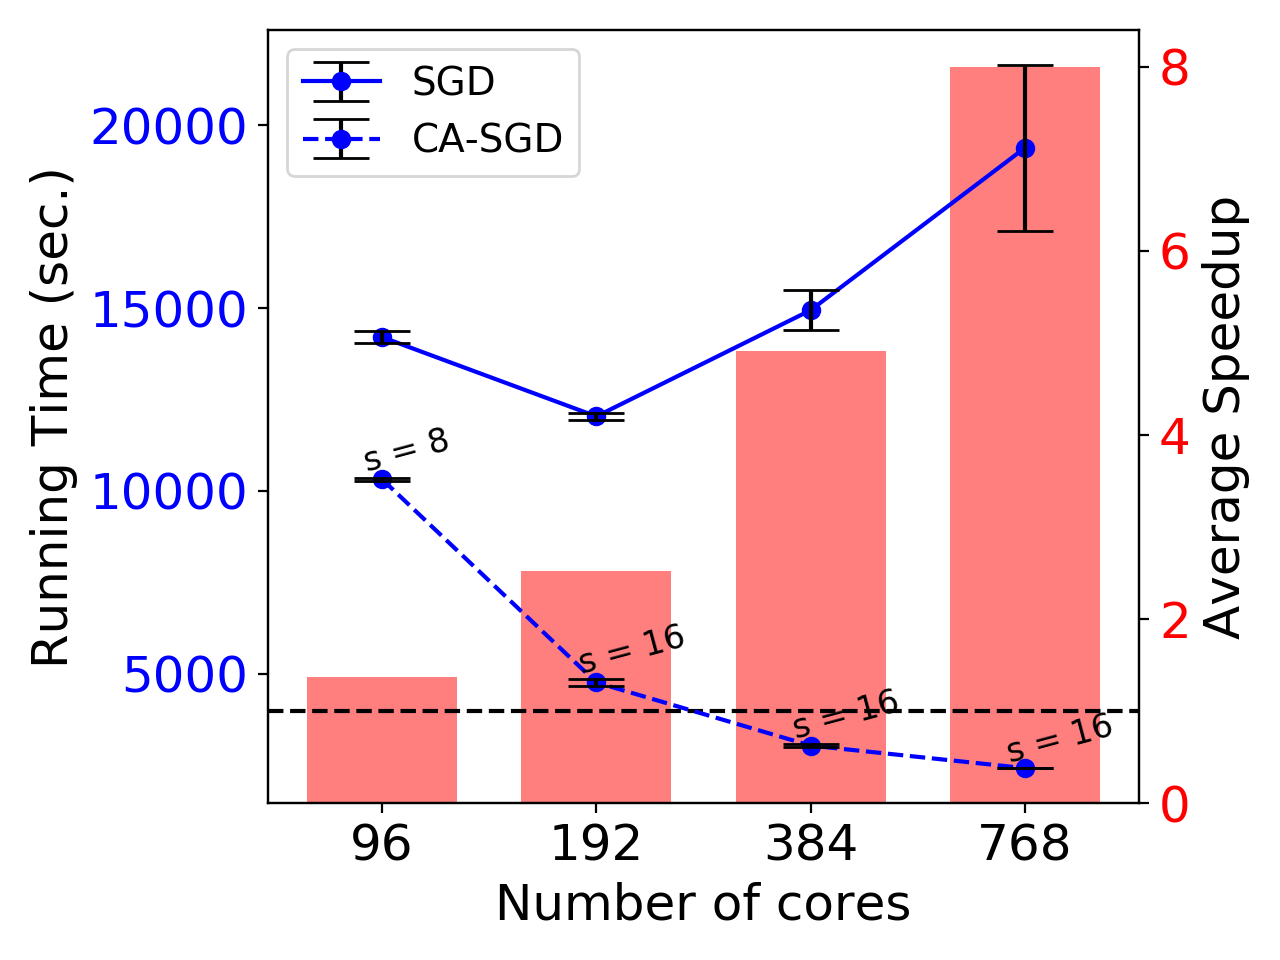

In [3]:
if not os.path.isdir(sgd_logpath):
    sys.stderr.write("option sgd_logpath is not a directory\n")

sgd_files = [f for f in os.listdir(sgd_logpath)]

all_sgd_times = []
sgd_times = []
i =0
ntimes = -1
p = []
for f in sgd_files:
    p.append(int(f[f.rfind('p')+1:f.rfind('.')]))
    with open(sgd_logpath+f) as fp:
        for line in fp:
            if 'logistic regression elapsed time:' in line:
                i += 1
                sgd_times.append(float(line[line.rfind(':')+2:line.rfind("ms")-1]))
    if ntimes == -1:
        ntimes = i;
    all_sgd_times.append((p[-1], sgd_times))
    sgd_times = []
all_sgd_times.sort(key= lambda x : x[0])
p.sort()

all_sgd_times = [x[1] for x in all_sgd_times]
#print(all_sgd_times)
#all_sgd_times = np.reshape(all_sgd_times, (len(sgd_files), ntimes))/1000
mean_sgd_times = []
stdev_sgd_times = []
for x in all_sgd_times:
    mean_sgd_times.append(np.mean(x)/1000)
    stdev_sgd_times.append(np.std(x)/1000)
print(mean_sgd_times)
print(stdev_sgd_times)
fig, ax = plt.subplots();
xvals = range(0,len(mean_sgd_times))
ax.errorbar(xvals, mean_sgd_times, yerr=stdev_sgd_times, label='SGD',
             fmt='b-o', alpha=1,
             ecolor='k', barsabove=True, capsize=10);
ax.legend();
plt.rc('legend',**{'fontsize':14})


In [4]:
casgd_files = [f for f in os.listdir(casgd_logpath)]
print(casgd_files)
s = []
all_casgd_times = []
casgd_times = []
ntimes = -1
i=0
p = []
for f in casgd_files:
    p.append(int(f[f.rfind('p')+1:f.rfind('_')]))
    s.append((p[-1], int(f[f.rfind('s')+1:f.rfind('.')])))
    with open(casgd_logpath+f) as fp:
        for line in fp:
            if 'logistic regression elapsed time:' in line:
                i += 1
                casgd_times.append(float(line[line.rfind(':')+2:line.rfind("ms")-1]))
        if ntimes == -1:
            ntimes = i;
        all_casgd_times.append((p[-1], casgd_times))
        casgd_times = []

all_casgd_times.sort(key= lambda x : x[0])
s.sort(key=lambda x : x[0])
p.sort()
print(all_casgd_times)
s = [x[1] for x in s]
all_casgd_times = [x[1] for x in all_casgd_times]
all_casgd_times = np.reshape(all_casgd_times, (len(casgd_files), ntimes))/1000

mean_casgd_times = np.mean(all_casgd_times, axis=1)
stdev_casgd_times = np.std(all_casgd_times, axis=1)

print(mean_casgd_times)
ax.errorbar(xvals, mean_casgd_times, yerr=stdev_casgd_times, label='CA-SGD',
             fmt='b--o', alpha=1,
             ecolor='k', barsabove=True, capsize=10)
print(xvals)

ax.legend()
ax.set_xlabel('Number of cores', fontsize=global_fontsize);
ax.set_ylabel('Running Time (sec.)', fontsize=global_fontsize);
ax.tick_params(axis='y', labelcolor='b', labelsize=global_fontsize)
#plt.title('SGD vs CA-SGD Strong Scaling');
plt.xticks(xvals, p, fontsize=global_fontsize);


['train_url_p192_s16.log', 'train_url_p384_s16.log', 'train_url_p768_s16.log', 'train_url_p96_s8.log']
[(96, [10399500.0, 10310400.0, 10289300.0, 10334900.0, 10249200.0]), (192, [4638070.0, 4745830.0, 4712990.0, 4848530.0, 4871490.0]), (384, [3088390.0, 3005780.0, 3005860.0, 3060420.0, 3032040.0]), (768, [2416430.0, 2430010.0, 2419380.0, 2424400.0, 2421130.0])]
[10316.66   4763.382  3038.498  2422.27 ]
range(0, 4)


In [5]:
if dset == "news20":
    for i,val in enumerate(s):
        if i == 0:
            ax.annotate('s = ' + str(val), (xvals[i]-0.5, mean_casgd_times[i]-10),
            rotation=15, fontsize=12)
        elif i == 1:
            ax.annotate('s = ' + str(val), (xvals[i]-0.5, mean_casgd_times[i]+stdev_casgd_times[i]-10),
            rotation=15, fontsize=12)
        elif i == 3:
            ax.annotate('s = ' + str(val), (xvals[i]-0.1, mean_casgd_times[i]+stdev_casgd_times[i]+4),
            rotation=15, fontsize=12)
        else:
            ax.annotate('s = ' + str(val), (xvals[i]-.1, mean_casgd_times[i]+stdev_casgd_times[i]+2),
            rotation=15, fontsize=12)
elif dset =="realsim":
    for i, val in enumerate(s):
        ax.annotate('s = ' + str(val), (xvals[i]-.1, mean_casgd_times[i]+stdev_casgd_times[i]+2),
        rotation=15, fontsize=12)
elif dset =="url":
    for i, val in enumerate(s):
        ax.annotate('s = ' + str(val), (xvals[i]-.1, mean_casgd_times[i]+stdev_casgd_times[i]+150),
        rotation=15, fontsize=12)
ax2 = ax.twinx()
ax2.bar(xvals, (mean_sgd_times)/mean_casgd_times, color='r', alpha=.5, width=.7)
ax2.axhline(1, ls='--', c='k')
ax2.set_ylabel('Average Speedup', fontsize=global_fontsize)
ax2.tick_params(axis='y', labelcolor='r', labelsize=global_fontsize)

ax.set_zorder(ax2.get_zorder()+1)
print(ax.get_zorder())
print(ax2.get_zorder())
ax.patch.set_visible(False)

plt.tight_layout()
plt.savefig(dset+'_scaling.pdf',dpi=300,bbox_width='tight')
plt.show()


print('Best Speedup: ' + str(min(mean_sgd_times)/min(mean_casgd_times)))

1
0
Best Speedup: 4.969404731925011
